<a href="https://colab.research.google.com/github/stefymojica/MACC/blob/main/Caso_de_Uso_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASO DE ESTUDIO 2:** PREDICCIÓN DE LA CALIDAD DEL VINO
**Estudiantes:** Sara Castillejo Ditta - Stefany Mojica Melo

**Asignatura:** Aprendizaje de máquina

*Matemáticas Aplicadas y Ciencias de la Computación*

*2025/2*

**Contenido del cuaderno:**

1. Comprensión del Problema y Análisis de Datos (EDA)

    1.1 *Creación de la Variable Objetivo:*

    1.2 *Distribución de Variables:*

    1.3 *Correlación con la Calidad:*

2. Preprocesamiento y Preparación de Datos

    2.1 *Escalado de Características:*
    
    2.2 *División de Datos*

3. Modelado con Árbol de Decisión

    3.1 *Interpretabilidad y Visualización:*
    
    3.2 *Sobreajuste (Overfitting):*
    
    3.3 *Importancia de Características:*

4. Modelado con Naive Bayes
    
    4.1 *El Supuesto ”Naive” (Ingenuo):*
    
    4.2 *Probabilidades a Posteriori:*
    
    4.3 *Manejo de Datos Continuos:*

5. Evaluación comparativa y conclusiones

    5.1 *Métricas de Rendimiento:*
    
    5.2 *Análisis de Errores:*
    
    5.3 *Curva ROC y AUC:*

    5.4 *Recomendación Final:*




##**1. Comprensión del Problema y Análisis de Datos (EDA)**

In [1]:
pip install ucimlrepo --q

In [35]:
# Importar librerías
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#  ---------- Cargar datos -------------
wine_quality = fetch_ucirepo(id=186)

# Convertir a Dataframes
X = wine_quality.data.features
y = wine_quality.data.targets

# Unificar para el EDA
df_wine = pd.concat([X, y], axis=1)

# Mostrar la información básica de los datos cargados
print("--- Descripción general de los datos ---")
print(df_wine.info())

# Mostrar los primeros registros
print("--- Primeros 5 registros ---")
df_wine.head()

--- Descripción general de los datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB
None
--- Primeros 5 registros ---


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
pd.unique(df_wine['quality'])

array([5, 6, 7, 4, 8, 3, 9])

###**1.1 Creación de la Variable Objetivo:**
Cree la nueva variable objetivo binaria (alta calidad). Un vino con quality
≥ 7 será etiquetado como 1 (alta calidad) y los demás como 0 (calidad estándar). Cuantifique el desbalance de clases en esta nueva variable. ¿Qué implicaciones tiene este desbalance?

Distribución de Clases (Diagnóstico)
alta_calidad
0    5220
1    1277
Name: count, dtype: int64

Probabilidades a Priori
alta_calidad
0    0.803448
1    0.196552
Name: proportion, dtype: float64


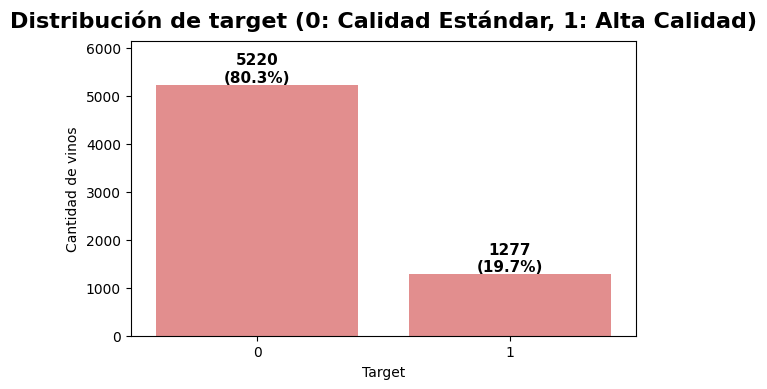


Estadísticas Descriptivas de las Características (X)


,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [5]:
#  ---------- Variable objetivo y su distribución -------------

# Crear la variable objetivo binaria
df_wine['alta_calidad'] = (df_wine['quality'] >= 7).astype(int)

# Verificar la distribución de la nueva variable
print("Distribución de Clases (Diagnóstico)")
print("=" * 50)
print(df_wine['alta_calidad'].value_counts())
print("\nProbabilidades a Priori")
print("=" * 50)
print(df_wine['alta_calidad'].value_counts(normalize=True))

# Visualizar la distribución de clases
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='alta_calidad', data=df_wine, color='lightcoral')

# Agregar porcentajes sobre las barras
total = len(df_wine)
for p in ax.patches:
    altura = p.get_height()
    porcentaje = f'{100 * altura/total:.1f}%'
    ax.text(p.get_x() + p.get_width()/2., altura,
            f'{int(altura)}\n({porcentaje})',
            ha='center', va='bottom', fontsize=11, fontweight='bold')
# Aumentar límite Y
ax.set_ylim(0, ax.get_ylim()[1] * 1.12)

plt.title('Distribución de target (0: Calidad Estándar, 1: Alta Calidad)', fontsize=16, fontweight='bold', y=1.02)
plt.xlabel('Target')
plt.ylabel('Cantidad de vinos')
plt.tight_layout()  # Ajusta automáticamente los márgenes
plt.show()

# Obtener estadísticas descriptivas de las características numéricas
print("\nEstadísticas Descriptivas de las Características (X)") # ¿se refiere sin variable target?
print("=" * 50)
display(df_wine.describe().T) # Usamos .T para transponer la tabla y que sea más fácil de leer

**Respuesta:** La clase de alta calidad es minoritaria (solo el 19.66% del dataset), lo que genera un fuerte desbalance que puede llevar a los modelos a centrarse en la clase negativa (baja calidad), fallando en reconocer vinos realmente buenos.

###**1.2 Distribución de Variables:**
Visualice la distribución de al menos tres variables predictoras (ej. alcohol, volatile acidity, sulphates) usando histogramas o diagramas de densidad. ¿Siguen una distribución normal (gaussiana)?
¿Por qué es relevante esta observación para el modelo Naive Bayes?

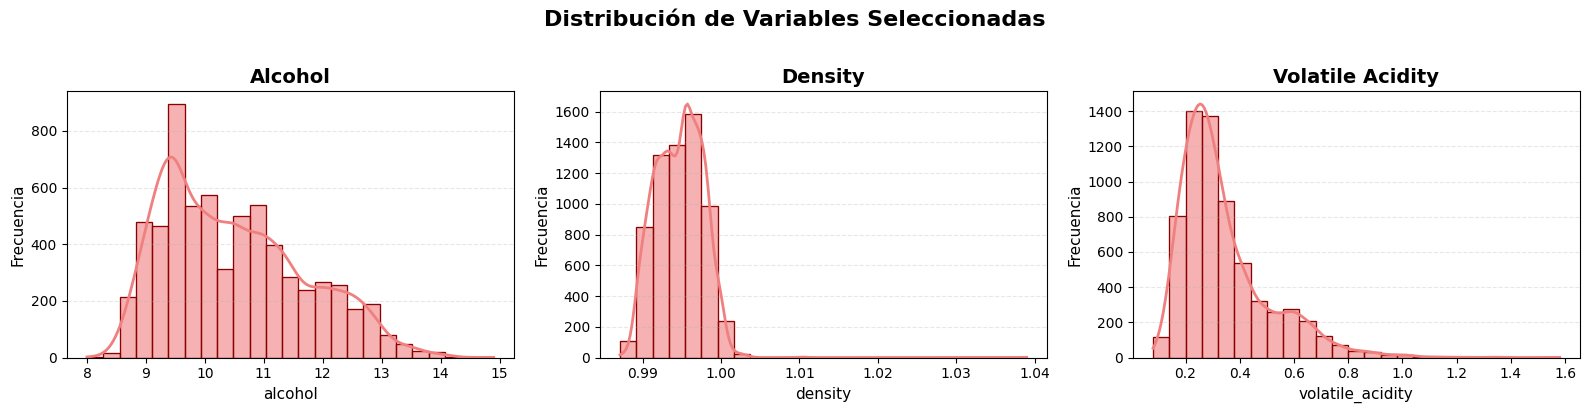

In [6]:
#  ---------- Distribución de variables -------------

# Selección de tres (3) variables
df_distr_wine = ['alcohol', 'density', 'volatile_acidity']

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for i, variable in enumerate(df_distr_wine):
    # Histograma
    sns.histplot(data=df_wine, x=variable, kde=True, ax=axes[i],
                 color='lightcoral', edgecolor='darkred',
                 bins=25, alpha=0.6, line_kws={'linewidth': 2})

    # Personalización
    axes[i].set_title(f'{variable.replace("_", " ").title()}',
                     fontsize=14, fontweight='bold')
    axes[i].set_xlabel(variable, fontsize=11)
    axes[i].set_ylabel('Frecuencia', fontsize=11)
    axes[i].grid(axis='y', alpha=0.3, linestyle='--')

plt.suptitle('Distribución de Variables Seleccionadas',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

**Respuesta:** Las distribuciones no son normales, la de Alcohol y la de Volatile Acidity están sesgadas a la izquierda con una cola larga a la derecha. La distribución de Density sí se ve como una campana en sus extremos, pero también está un poco sesgada, esta vez a a derecha y tiene unos datos atípicos que también alargan su cola derecha.

Estas distribuciones son una alerta para modelar con Naive Bayes, ya que este algoritmo asume normalidad en las variables contínuas. Lo ideal sería discretizarlas (llevandolas a categorías).

###**1.3 Correlación con la Calidad:**
Calcule la correlación de todas las variables predictoras con la variable quality original.
¿Qué características parecen ser más importantes para determinar la calidad del vino? ¿Coincide esto con la intuición general sobre vinos?

Correlaciones con 'quality':
alcohol             :  0.4443
citric_acid         :  0.0855
free_sulfur_dioxide :  0.0555
sulphates           :  0.0385
pH                  :  0.0195
residual_sugar      : -0.0370
total_sulfur_dioxide: -0.0414
fixed_acidity       : -0.0767
chlorides           : -0.2007
volatile_acidity    : -0.2657
density             : -0.3059


Boxplots por clases de 'alta_calidad':


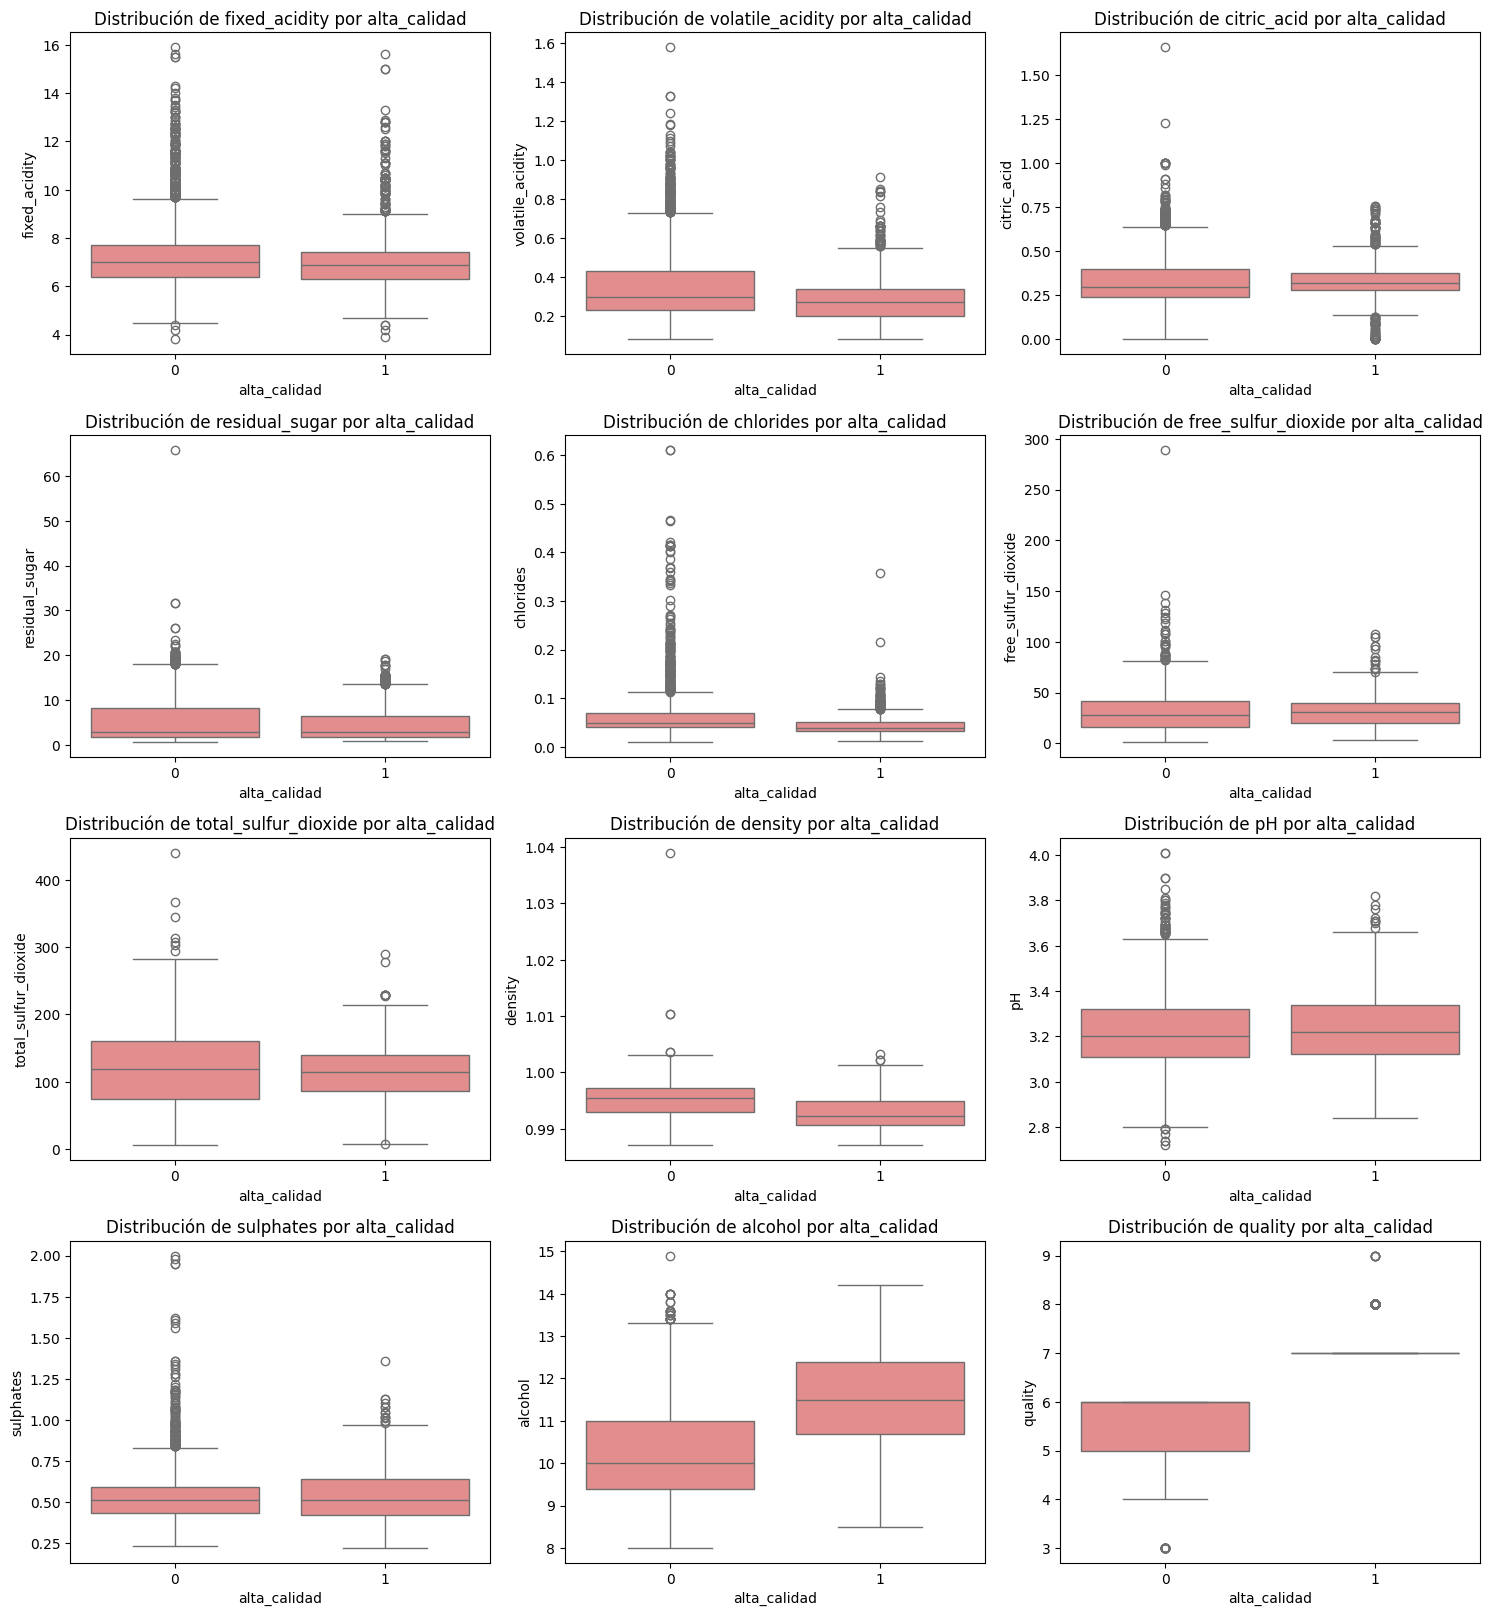

In [7]:
#  ---------- Correlaciones con la variable orginal -------------

# Calcular la correlación de todas las variables con 'quality'
df_cor_wine = df_wine.corr()['quality'].sort_values(ascending=False)

# Mostrar las correlaciones (sin quality ni alta_calidad)
print("Correlaciones con 'quality':")
print("=" * 50)
for variable, correlacion in df_cor_wine.drop('quality').items():
    if variable != 'alta_calidad':  # Excluir la variable que acabamos de crear
        print(f"{variable:20s}: {correlacion:7.4f}") # Texto con 20 caracteres y números con 4 decimales

#  ---------- Boxblots de características por clase de la nueva variable -------------

# Graficar boxplots para comparar distribuciones
print("\n\nBoxplots por clases de 'alta_calidad':")
print("=" * 50)
features_to_plot = df_wine.columns[:-1].tolist()

plt.figure(figsize=(15, 40))
for i, feature in enumerate(features_to_plot):
  if feature != 'alta_calidad':
    plt.subplot(10, 3, i + 1)
    sns.boxplot(x='alta_calidad', y=feature, data=df_wine, color='lightcoral')
    plt.title(f'Distribución de {feature} por alta_calidad')

plt.tight_layout()
plt.show()

**Respuesta:** lalala

##**2. Preprocesamiento y Preparación de Datos**

###**2.1 Escalado de Características:**
Los Árboles de Decisión son inmunes al escalado de características, pero muchos otros algoritmos no lo son. Explique por qué el escalado (ej. StandardScaler) es un paso recomendado antes de entrenar un modelo como Gaussian Naive Bayes.

**Respuesta:** El escalado es esencial en Gaussian Naive Bayes porque su función de probabilidad se basa en medias y desviaciones estándar que pueden verse afectadas por variables con escalas distintas, al contrario de los arboles de decision donde toman decisiones por comparaciones y no se basan en calculos en magnitudes numericas.

###**2.2 División de Datos:**
Divida el conjunto de datos en un 80% para entrenamiento y un 20% para prueba. Justifique la importancia de usar un random state en la división para asegurar la reproducibilidad de sus resultados.

**Respuesta:** La division de los datos permite que el modelo no aprenda a memorizar la información sino que aprenda los patrones generales de los datos, así se le estaria pasando información nueva al modelo con la cual se hacen validaciones.

In [8]:
X = df_wine.drop(columns=['quality','alta_calidad'], axis=1)
y = df_wine['alta_calidad']
#X.head()

In [9]:
#  ---------- División de datos -------------

# --- 2. División en Conjuntos de Entrenamiento y Prueba ---
# Usamos X (características originales) e y_encoded (objetivo numérico)
# test_size=0.2 significa que el 20% de los datos se usará para la prueba
# random_state=42 asegura que la división sea siempre la misma, para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verificamos las dimensiones de los conjuntos resultantes
print("\n--- Dimensiones de los Conjuntos de Datos ---")
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de y_test: {y_test.shape}")


--- Dimensiones de los Conjuntos de Datos ---
Forma de X_train: (5197, 11)
Forma de X_test: (1300, 11)
Forma de y_train: (5197,)
Forma de y_test: (1300,)


In [10]:
#  ---------- Estandarización para Gaussean Naive -------------

# 1. Instanciar el escalador
scaler = StandardScaler()

# 2. Ajustar el escalador SÓLO con los datos de entrenamiento y transformarlos
# El método .fit() calcula la media y la desviación estándar de X_train
# El método .transform() aplica la fórmula de estandarización
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transformar los datos de prueba usando el MISMO escalador (ya ajustado)
X_test_scaled = scaler.transform(X_test)

# Convertimos los resultados (que son arrays de NumPy) de nuevo a DataFrames para verlos mejor
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

#print("--- Primeras 5 filas de los datos de entrenamiento SIN escalar ---")
#display(X_train.head())

print("\n--- Primeras 5 filas de los datos de entrenamiento ESCALADOS ---")
display(X_train_scaled_df.head())


--- Primeras 5 filas de los datos de entrenamiento ESCALADOS ---


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.468229,-0.599512,0.205467,0.464612,-0.712801,0.311659,0.343566,-0.296146,-0.168884,-1.083266,0.013766
1,0.851500,-0.352849,1.104063,-0.702999,1.067470,-1.408735,-1.847518,-0.203072,0.269679,0.598577,1.608717
2,0.385713,2.329612,-2.144710,-0.702999,0.234762,0.024927,-1.295294,-0.326062,1.209455,0.262208,1.105048
3,-1.555065,0.202143,0.067221,-0.890650,-0.798944,-1.007309,-0.618374,-1.492810,0.958848,-1.015992,1.021103
4,-0.468229,-0.476180,1.657046,2.070076,-0.081092,0.082273,0.450448,1.133204,-0.670098,-0.275981,-0.993572


##**3. Modelado con Árbol de Decisión**

###**3.1 Interpretabilidad y Visualización:**

Entrene un Árbol de Decisión con una profundidad máxima (max depth) de 3.
Visualice el árbol resultante. Interprete una de las rutas desde el nodo raíz hasta una hoja. ¿Qué reglas ha aprendido el modelo para clasificar un vino como de "alta calidad"?


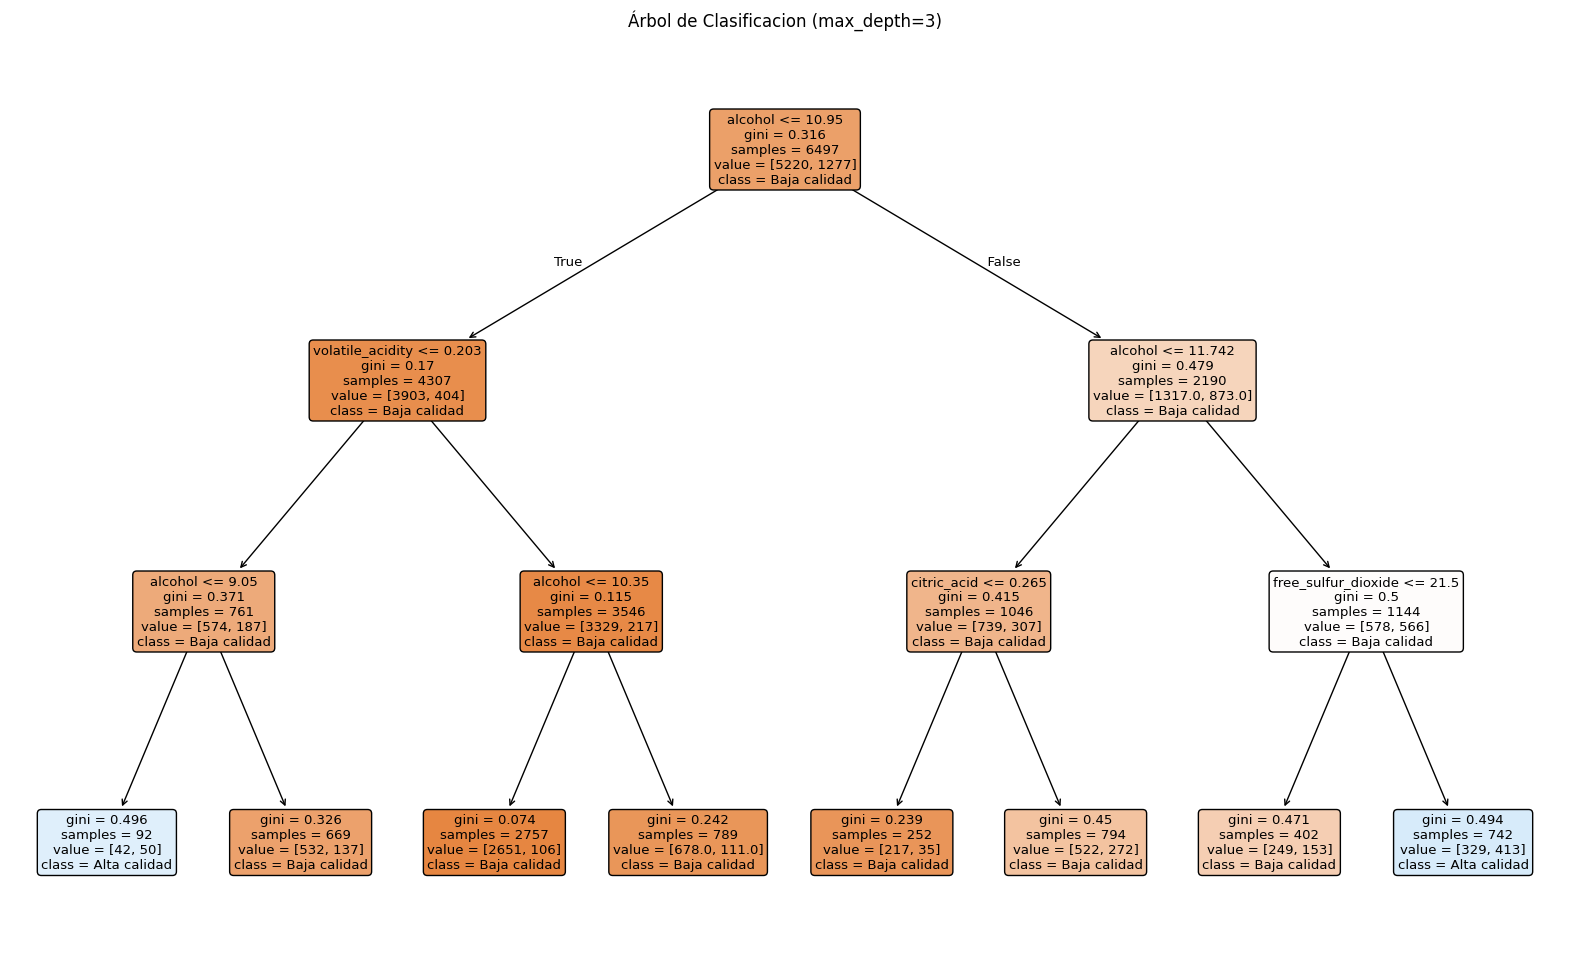

In [34]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
# entrenamiento del modelo
tree.fit(X, y)

# Predecir y evaluar el error del modelo final
y_pred_tree = tree.predict(X_test)

class_names = ['Baja calidad', 'Alta calidad']
plt.figure(figsize=(20, 12))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
plt.title("Árbol de Clasificacion (max_depth=3)")
plt.show()


**Respuesta:**

**Interpretacion de una ruta:** Si el vino tiene un contenido de alcohol menor o igual a 10.95, su acidez volátil es menor o igual a 0.20, y el alcohol es además menor o igual a 10.35, entonces el vino tiene muy baja probabilidad de ser un vino de alta calidad.

**Caracteristicas que aprendio:** El árbol de decisión aprendió que los vinos de alta calidad suelen tener un contenido elevado de alcohol y un nivel moderado/alto de dióxido de azufre libre, lo que está asociado con mejor conservación y sabor y que la volatilidad de la acidez debe ser baja. Estas características combinadas aumentan la probabilidad de que un vino sea considerado de calidad alta.

###**3.2 Sobreajuste (Overfitting):**

Explique el concepto de sobreajuste en el contexto de los Árboles de Decisión. ¿Qué sucedería con el rendimiento del modelo en los datos de entrenamiento vs. los de prueba si no se controla la profundidad del árbol?

**Respuesta:** El sobreajuste en árboles de decisión ocurre cuando el modelo se vuelve excesivamente complejo, aprende patrones irrelevantes y ruido del conjunto de entrenamiento. Si no se controla la profundidad del árbol, el rendimiento será muy alto en entrenamiento pero bajo en los datos de prueba, porque el modelo no podrá generalizar correctamente

###**3.3 Importancia de Características:**

Los árboles de decisión pueden calcular la importancia de cada característica. Extraiga y visualice la importancia de las características del modelo entrenado. ¿Coinciden las características más importantes con las que tenían mayor correlación en el EDA?

**Respuesta:** Si coinciden las caracteristicas con el EDA, ya que el alcohol se comporta como el principal indicador de calidad, mientras que una baja acidez volátil contribuye a una mejor percepción del vino. Además, niveles adecuados de dióxido de azufre apoyan la preservación y se asocian con vinos de alta calidad.

El feature de acidez volatil es una relacion inversa, donde entre mas bajo es mejor el vino

##**4. Modelado con Naive Bayes**

###**4.1 El Supuesto ”Naive” (Ingenuo):**
El algoritmo Naive Bayes se basa en un supuesto fundamental sobre las características. ¿Cuál es este supuesto y por qué se considera ”ingenuo”?, ¿cree que este supuesto se cumple para las variables fisicoquímicas del vino?, Justifique.

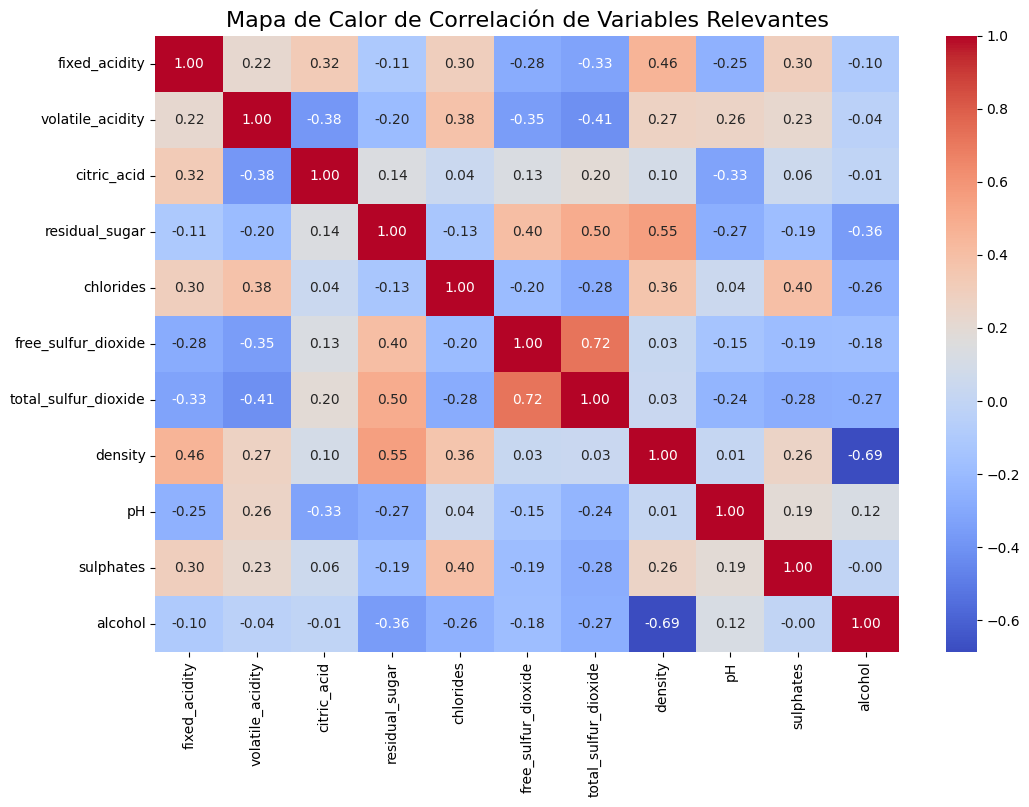

In [22]:
correlation_matrix = X.corr() #X no tiene la variable objetivo ni la codificada

plt.figure(figsize=(12, 8))
sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f"
    )
plt.title('Mapa de Calor de Correlación de Variables Relevantes', fontsize=16)
plt.show()

**Respuesta:** El supuesto fundamental es que las características son independientes entre sí, dada la clase. Es ingenuo porque rara vez se cumple esta condición en la vida real, lo usual es que en un dataset las variables estén correlacionadas. Este supuesto es entonces una simplificación matemática para que funcione, pero no es realista.

En vista de la matriz de correlaciones de las variables fisicoquímicas del vino, hay al menos una relación lineal detectada entre alcohol y densidad. Esta es de -0.69, lo que indica que cuando una aumenta, la otra decrese.  

###**4.2 Probabilidades a Posteriori:**
Explique, en términos conceptuales, cómo el clasificador Naive Bayes utiliza las
distribuciones de las características (aprendidas de los datos de entrenamiento) y el Teorema de Bayes para calcular la probabilidad de que un nuevo vino sea de "alta calidad".

In [20]:
# Entrenamiento de Naive Bayes:
# 1. Probabilidades a priori
print("\n--- Probabilidades a priori ---")
print(df_wine['alta_calidad'].value_counts(normalize=True))

# 2. Estadísticas descriptivas de las características numéricas
print("\n--- Distribuciones de las características ---")
display(X.describe().T)


--- Probabilidades a priori ---
alta_calidad
0    0.803448
1    0.196552
Name: proportion, dtype: float64

--- Distribuciones de las características ---


,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


**Respuesta:**

***Entrenamiento***

El clasificador revisa los datos de entrenamiento y ajusta sus *probabilidades a priori* según la distribución de clases de la variable objetivo. Para este caso ellas serían:

*    P(calidad estándar) = 0.80
*    P(alta calidad) = 0.20

Esto equivale a asumir que, sin ver sus características, el 20% de los vinos son de alta calidad.

Luego, revisa las distribuciones de las características para cada una de las clases de la variable objetivo. Esto le permite aprender la media y la desviación estándar de cada variable cuando la clase es '0' (calidad estándar) y cuando es '1' (alta calidad).

Además de las *probabilidades a priori*, el modelo ahora puede describir las características de un vino estándar o de alta calidad.

***Predicción***

Cuando ve un vino que no conoce, para saber si es de alta calidad o no, el clasificador usa el Teorema de Bayes. En principio, calcula 2 probabilidades:

1.   La probabilidad de que el vino sea de alta calidad, dadas sus características: Usa las distribuciones aprendidas en el entrenamiento para las características del vino cuando la clase es '1' y evalúa qué tan probable es que cada característica del nuevo vino corresponda con ellas. A final, multiplica todas las probabilidades de las características y las pondera por la probabilidad previa de cada clase (la probabilidad de 20%).

2.   La probabilidad de que el vino sea de calidad estándar, dadas sus características: Hace el mismo proceso pero ahora con las distribuciones aprendidas para la clase '0'.

Finalmente, el clasificador elige la clase con mayor *probabilidad posterior* entre las dos. Esto equivale a responderse una pregunta como ¿en qué grupo de vinos encajaría mejor el vino nuevo, considerando todas sus características?.


###**4.3 Manejo de Datos Continuos:**
El modelo estándar de Naive Bayes funciona con características categóricas. Dado que nuestras variables son continuas, se utiliza comúnmente la variante Gaussian Naive Bayes. ¿Qué asume este modelo sobre la distribución de los datos de cada clase?

**Respuesta:** Gaussian Naive Bayes asume que las distribuciones de las características difieren entre las clases. Puntualmente en el caso de los vinos, la media y la desviación estándar de sus variables físicoquímicas deberían diferir entre los datos que corresponden a los vinos de 'calidad estándar' y los de 'alta calidad'.

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Instanciar el modelo
# Creamos una instancia del clasificador Naive Bayes Gaussiano
gnb_model = GaussianNB()

# 2. Entrenar el modelo
# Usamos el método .fit() con nuestros datos de entrenamiento escalados
gnb_model.fit(X_train_scaled, y_train)

# 3. Realizar predicciones
# Usamos el modelo entrenado para predecir las etiquetas del conjunto de prueba
y_pred_naive = gnb_model.predict(X_test_scaled)

# 4. Primera evaluación: Exactitud (Accuracy)
# Comparamos las predicciones (y_pred) con las etiquetas reales (y_test)
accuracy = accuracy_score(y_test, y_pred_naive)

print("--- Predicciones del Modelo ---")
print(f"Primeras 10 predicciones: {y_pred_naive[:10]}")
print(f"Primeras 10 etiquetas reales: {y_test[:10]}")

print(f"\nLa exactitud (Accuracy) del modelo en el conjunto de prueba es: {accuracy:.4f}")
print(f"Esto significa que el {accuracy:.2%} de las predicciones fueron correctas.")

--- Predicciones del Modelo ---
Primeras 10 predicciones: [0 0 1 0 0 0 0 0 0 1]
Primeras 10 etiquetas reales: 3103    1
1419    0
4761    1
4690    0
4032    0
1297    0
1773    0
5584    0
561     0
5946    1
Name: alta_calidad, dtype: int64

La exactitud (Accuracy) del modelo en el conjunto de prueba es: 0.7608
Esto significa que el 76.08% de las predicciones fueron correctas.


##**5. Evaluación comparativa y conclusiones:**

###**5.1 Métricas de Rendimiento:**
Debido al desbalance de clases, la exactitud (accuracy) no es la mejor métrica. Compare ambos modelos utilizando la Precisión, el Recall y el F1-Score para la clase minoritaria (”alta calidad”). ¿Qué modelo es mejor para identificar correctamente los vinos buenos?

In [36]:
# Generar reportes de Clasificación
report_tree = classification_report(y_test, y_pred_tree)
report_naive = classification_report(y_test, y_pred_naive)

print("--- MÉTRICAS PARA ÁRBOL DE DECISIÓN ---")
print(report_tree)
print("\n--- MÉTRICAS PARA NAIVE ---")
print(report_naive)

--- MÉTRICAS PARA ÁRBOL DE DECISIÓN ---
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1048
           1       0.53      0.35      0.42       252

    accuracy                           0.81      1300
   macro avg       0.69      0.64      0.66      1300
weighted avg       0.79      0.81      0.80      1300


--- MÉTRICAS PARA NAIVE ---
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1048
           1       0.42      0.64      0.51       252

    accuracy                           0.76      1300
   macro avg       0.66      0.72      0.68      1300
weighted avg       0.81      0.76      0.78      1300



###**5.2 Análisis de Errores:**
Compare las matrices de confusión de ambos modelos. En el contexto de una bodega, ¿qué error es más costoso: un Falso Positivo (etiquetar un vino estándar como de alta calidad) o un Falso Negativo (etiquetar un vino de
alta calidad como estándar)? Justifique su elección y determine qué modelo es preferible según este criterio.

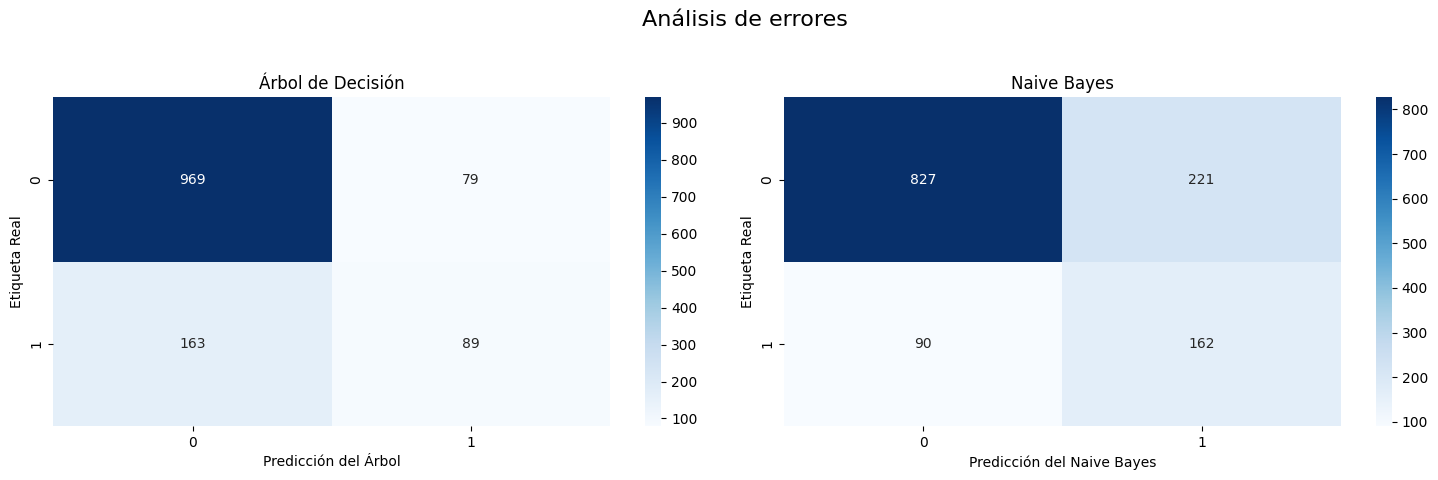


--- 🔍 COMPARACIÓN DE MODELOS --- 

Métrica                    Naive Bayes        Árbol   Diferencia
-----------------------------------------------------------------
TN (Correctos negativos)           827          969         +142
FP (Falsas alarmas)                221           79         -142


In [39]:
# 1. Calcular las matrices de confusión
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_naive = confusion_matrix(y_test, y_pred_naive)

# 2. Visualizar la Matriz de Confusión
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Análisis de errores', fontsize=16)

# Matriz del Árbol
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_xlabel('Predicción del Árbol')
axes[0].set_ylabel('Etiqueta Real')
axes[0].set_title('Árbol de Decisión')

# Matriz del Naive Bayes
sns.heatmap(cm_naive, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_xlabel('Predicción del Naive Bayes')
axes[1].set_ylabel('Etiqueta Real')
axes[1].set_title('Naive Bayes')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Explicación manual de los valores ---
tn_nb, fp_nb, fn_nb, tp_nb = cm_naive.ravel()
tn_tr, fp_tr, fn_tr, tp_tr = cm_tree.ravel()

print("\n--- 🔍 COMPARACIÓN DE MODELOS --- \n")
print(f"{'Métrica':<25} {'Naive Bayes':>12} {'Árbol':>12} {'Diferencia':>12}")
print("-" * 65)
print(f"{'TN (Correctos negativos)':<25} {tn_nb:>12} {tn_tr:>12} {tn_tr-tn_nb:>+12}")
print(f"{'FP (Falsas alarmas)':<25} {fp_nb:>12} {fp_tr:>12} {fp_tr-fp_nb:>+12}")


###**5.3 Curva ROC y AUC:**
Genere las curvas ROC para ambos modelos en el mismo gráfico y compare sus valores de AUC.
¿Qué nos dice el área bajo la curva sobre la capacidad general de cada modelo para discriminar entre las dos clases?

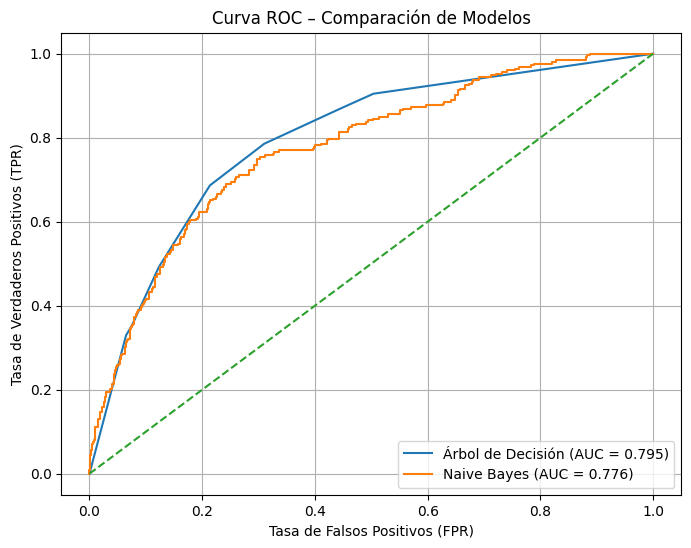


--- AUC Scores ---
AUC Árbol de Decisión: 0.7951
AUC Naive Bayes: 0.7756


In [40]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Obtener probabilidades para la clase positiva (1)
y_prob_tree = tree.predict_proba(X_test)[:, 1]
y_prob_naive = gnb_model.predict_proba(X_test_scaled)[:, 1]

# ROC Curves
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_naive, tpr_naive, _ = roc_curve(y_test, y_prob_naive)

# AUC
auc_tree = auc(fpr_tree, tpr_tree)
auc_naive = auc(fpr_naive, tpr_naive)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f"Árbol de Decisión (AUC = {auc_tree:.3f})")
plt.plot(fpr_naive, tpr_naive, label=f"Naive Bayes (AUC = {auc_naive:.3f})")

# Línea base
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title("Curva ROC – Comparación de Modelos")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\n--- AUC Scores ---")
print(f"AUC Árbol de Decisión: {auc_tree:.4f}")
print(f"AUC Naive Bayes: {auc_naive:.4f}")


###**5.4 Recomendación Final:**
Basándose en una evaluación integral que considere el rendimiento (F1-Score, AUC), la interpretabilidad, la robustez a los supuestos del modelo y la simplicidad, ¿qué modelo (Árbol de Decisión o Naive Bayes) recomendaría a la bodega para su sistema de control de calidad? Justifique su elección.